# 00. PyTorch Fundamentals Exercises

### 1. Documentation reading 

A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course. So I'd recommend spending 10-minutes reading the following (it's okay if you don't get some things for now, the focus is not yet full understanding, it's awareness):
  * The documentation on [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor).
  * The documentation on [`torch.cuda`](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics).



In [1]:
# No code solution (reading)

In [12]:
import torch
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### 2. Create a random tensor with shape `(7, 7)`.


In [22]:
random_tensor = torch.randn((7,7))

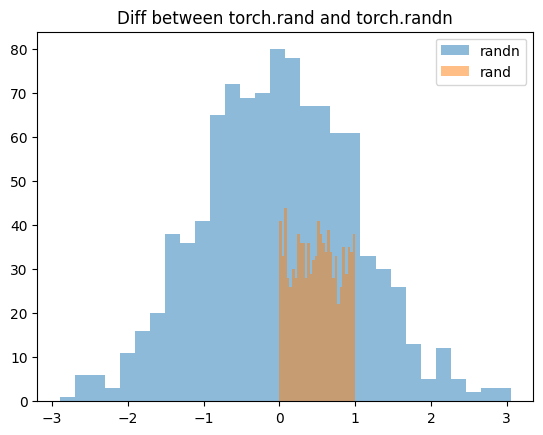

In [23]:
# visualize difference between randn and rand, where randn produces random numbers
# following a normal distribution and rand produces random numbers following a
# uniform distribution between [0,1)
random_vec = torch.randn(1000)
random_vec2 = torch.rand(1000)

plt.hist(random_vec.numpy(), bins=30, alpha=0.5, label='randn')
plt.hist(random_vec2.numpy(), bins=30, alpha=0.5, label='rand')
plt.legend()
plt.title('Diff between torch.rand and torch.randn')
plt.show()

### 3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape `(1, 7)` (hint: you may have to transpose the second tensor).

In [29]:
random_tensor_2 = torch.randn((1,7))
matrix_mult = torch.mm(random_tensor, random_tensor_2.T)
matrix_mult

tensor([[-2.6968],
        [ 0.8894],
        [-3.6744],
        [-0.6239],
        [ 0.0447],
        [ 1.9515],
        [-0.4366]])

### 4. Set the random seed to `0` and do 2 & 3 over again.

The output should be:
```
(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]), torch.Size([7, 1]))
```

In [31]:
torch.manual_seed(42)


# Create two random tensors
random_tensor = torch.randn((7,7))
random_tensor_2 = torch.randn((1,7))

# Matrix multiply tensors
matrix_mult = torch.mm(random_tensor, random_tensor_2.T)
matrix_mult


tensor([[ 5.7713],
        [-0.2804],
        [-0.6681],
        [-3.0184],
        [ 1.6454],
        [ 1.5024],
        [-1.3706]])

### 5. Speaking of random seeds, we saw how to set it with `torch.manual_seed()` but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one)
  * If there is, set the GPU random seed to `1234`.

In [38]:
torch.mps.device_count()

1

In [35]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
device

'mps'

In [36]:
# Set random seed on the GPU
torch.mps.manual_seed(42)


### 6. Create two random tensors of shape `(2, 3)` and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed). The output should be something like:

```
Device: cuda
(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))
```

In [ ]:
# Set random seed
torch.manual_seed(1234)

# Check for access to GPU
print(f'Apple Silicon GPU available: {torch.backends.mps.is_available()}')

# Create two random tensors on GPU
random_tensor_gpu_1 = torch.rand((2,3), device=device)
random_tensor_gpu_2 = torch.rand((2,3), device=device)

print('Random tensors on GPU:')
print(random_tensor_gpu_1, random_tensor_gpu_1.shape)
print(random_tensor_gpu_2, random_tensor_gpu_2.shape)

print('Random tensors on CPU:')
random_tensor_cpu_1 = torch.rand((2,3))
random_tensor_cpu_2 = torch.rand((2,3))
print(random_tensor_cpu_1, random_tensor_cpu_1.shape)
print(random_tensor_cpu_2, random_tensor_cpu_2.shape)

# The results are different between Apple Silicon, CUDA CPU although the seed is the same
# due to the underlying implementation of the RNG algorithm between the
# different pytorch backends. Pytorch has different RNG algorithms for different
# hardware to optimize for that hardware

Apple Silicon GPU available: True
Random tensors on GPU:
tensor([[0.4794, 0.7608, 0.8283],
        [0.8029, 0.6423, 0.0597]], device='mps:0') torch.Size([2, 3])
tensor([[0.0223, 0.9878, 0.2711],
        [0.9123, 0.7672, 0.8879]], device='mps:0') torch.Size([2, 3])
Random tensors on CPU:
tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]]) torch.Size([2, 3])
tensor([[0.0518, 0.4681, 0.6738],
        [0.3315, 0.7837, 0.5631]]) torch.Size([2, 3])



### 7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

The output should look like:
```
(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'), torch.Size([2, 2]))
```

In [77]:
# Perform matmul on tensor_A and tensor_B
matrix_mult = torch.mm(random_tensor_cpu_1, random_tensor_cpu_2.T)
matrix_mult, matrix_mult.shape

(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]]),
 torch.Size([2, 2]))

### 8. Find the maximum and minimum values of the output of 7.

In [74]:
# Find max
print(f'Max: {matrix_mult.max()}')
# Find min
print(f'Max: {matrix_mult.min()}')

Max: 0.5617256760597229
Max: 0.3647301197052002


### 9. Find the maximum and minimum index values of the output of 7.

In [78]:
# Find arg max
print(f'Arg Max: {matrix_mult.argmax()}') # Should be 3

# Find arg min
print(f'Arg Min: {matrix_mult.argmin()}') # Should be 0


Arg Max: 3
Arg Min: 0



### 10. Make a random tensor with shape `(1, 1, 1, 10)` and then create a new tensor with all the `1` dimensions removed to be left with a tensor of shape `(10)`. Set the seed to `7` when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

The output should look like:

```
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
```

In [79]:
# Set seed
torch.manual_seed(7)

# Create random tensor
random_tensor = torch.randn((1,1,1,10))

# Remove single dimensions
random_tensor_squeezed = random_tensor.squeeze()

# Print out tensors and their shapes
print('Before squeezing')
print(random_tensor, random_tensor.shape)

print()

print('After squeeze')
print(random_tensor_squeezed, random_tensor_squeezed.shape)


Before squeezing
tensor([[[[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908, -0.8948, -0.3556,
            1.2324,  0.1382, -1.6822]]]]) torch.Size([1, 1, 1, 10])

After squeeze
tensor([-0.1468,  0.7861,  0.9468, -1.1143,  1.6908, -0.8948, -0.3556,  1.2324,
         0.1382, -1.6822]) torch.Size([10])
